# **Feature Extraction and Price Prediction for Mobile Phones**


**Problem Statement**
- I worked for a prominent organization that specializes in selling mobile phones. The organization is keen to enhance its pricing strategy by gaining a deeper understanding of the key features that influence the prices of mobile phones in today's highly competitive market. my objective is to build a predictive model that can accurately estimate the price of a mobile phone based on its features. To achieve this, you'll perform a feature extraction analysis to identify the most influential features.



**Project Description:**
- In this project, I worked with a dataset that contains detailed information about various mobile phones, including their model, color, memory, RAM, battery capacity, rear camera specifications, front camera specifications, presence of AI lens, mobile height, processor, and, most importantly, the price.
- My goal is to develop a predictive model for mobile phone prices.


**Data Wrangling**
- It convert and format raw data to usable format down to data science pipeline

# **1. Data Exploration:**

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
# For Jupyter Notebook
%matplotlib inline
warnings.filterwarnings('ignore')


**Loading the given Dataset**

In [2]:
data=pd.read_csv('/content/Processed_Flipdata - Processed_Flipdata (1).csv')

In [3]:
data # to check data

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


**Check the shape of data**

In [4]:
data.shape[0]#only no of rows

541

In [5]:
data['Prize'].unique()


array(['7,299', '11,999', '5,649', '8,999', '7,999', '9,499', '10,699',
       '6,999', '15,999', '13,999', '12,999', '6,199', '6,599', '7,749',
       '9,699', '9,999', '10,999', '20,999', '15,499', '18,999', '12,499',
       '10,499', '14,490', '16,999', '6,499', '5,999', '6,299', '16,499',
       '14,499', '13,490', '19,999', '1,449', '1,849', '1,422', '29,999',
       '1,299', '17,999', '11,499', '2,615', '28,999', '23,999', '14,999',
       '2,490', '7,961', '2,499', '11,248', '6,799', '13,499', '8,749',
       '8,049', '1,375', '1,599', '7,499', '7,245', '26,999', '21,999',
       '17,499', '21,499', '7,115', '49,999', '32,999', '8,499', '25,999',
       '4,999', '3,549', '1,699', '920', '11,970', '1,199', '12,990',
       '6,978', '7,370', '44,999', '8,995', '24,999', '11,249', '34,999',
       '21,174', '43,999', '7,993', '8,069', '30,499', '30,999', '9,290',
       '8,449', '8,495', '29,499', '20,998', '19,280', '8,649', '19,499',
       '9,349', '8,288', '12,272', '6,794', '2

In [6]:
data.shape[1]#only no of columns

12

**Check first five Rows**

In [7]:
data.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


**Check all the column names of dataset**

In [8]:
data.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

In [9]:
# Number of uniqe elements in each columns
unique = data.nunique()
unique.to_frame().T

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,541,187,275,5,5,37,14,13,2,38,123,158


In [10]:
data.rename(columns={'Prize': 'Price'}, inplace=True)

**Convert the Price column to numeric:**

In [11]:
# Remove non-numeric characters if necessary
data['Price'] = data['Price'].replace('[\$,]', '', regex=True).astype(float)

# Verify the conversion
data['Price'].head()


0     7299.0
1     7299.0
2    11999.0
3     5649.0
4     8999.0
Name: Price, dtype: float64

In [12]:
data.dtypes

Unnamed: 0         int64
Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Price            float64
dtype: object

In [13]:
data.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299.0
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299.0
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999.0
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649.0
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999.0


**check info of dataset**

In [14]:
# Getting the informaatin of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Price          541 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.8+ KB


**Descriptive Statistics**

**Summary Statistics**
- **Measure of central Tendancy**
- **Mean**: Mean is the average of all values
- **mode**: Median is the middle value when data is sorted.
-**Median** : Mode is the most frequently occurring value in the dataset.
-**Describe()** is used to view some basic statistical details like percentile, mean, std, etc. of a data frame or a series of numeric values.

In [15]:
data.describe(include='all')

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
count,541.000000,541,541,541.000000,541.000000,541.000000,541,541,541.000000,541.000000,541,541.000000
unique,NaN,187,275,NaN,NaN,NaN,14,13,NaN,NaN,123,NaN
top,NaN,vivo Y16,Yellow,NaN,NaN,NaN,50MP,16MP,NaN,NaN,Qualcomm Snapdragon 680,NaN
freq,NaN,9,12,NaN,NaN,NaN,260,164,NaN,NaN,33,NaN
mean,289.711645,NaN,NaN,110.550832,5.397412,4871.587800,NaN,NaN,0.062847,16.431201,NaN,16228.375231
std,182.359185,NaN,NaN,60.600694,1.984923,780.148862,NaN,NaN,0.242911,2.523553,NaN,10793.588322
min,0.000000,NaN,NaN,16.000000,2.000000,800.000000,NaN,NaN,0.000000,4.500000,NaN,920.000000
25%,135.000000,NaN,NaN,64.000000,4.000000,5000.000000,NaN,NaN,0.000000,16.510000,NaN,9290.000000
50%,273.000000,NaN,NaN,128.000000,6.000000,5000.000000,NaN,NaN,0.000000,16.710000,NaN,13499.000000
75%,434.000000,NaN,NaN,128.000000,8.000000,5000.000000,NaN,NaN,0.000000,16.940000,NaN,19280.000000


In [16]:
data.dtypes

Unnamed: 0         int64
Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Price            float64
dtype: object

**It filters columns that have object data types, which typically represent strings or categorical variables.**

In [17]:
cat_col=data.select_dtypes(include='object')

In [18]:
cat_col

,Model,Colour,Rear Camera,Front Camera,Processor_
0,Infinix SMART 7,Night Black,13MP,5MP,Unisoc Spreadtrum SC9863A1
1,Infinix SMART 7,Azure Blue,13MP,5MP,Unisoc Spreadtrum SC9863A1
2,MOTOROLA G32,Mineral Gray,50MP,16MP,Qualcomm Snapdragon 680
3,POCO C50,Royal Blue,8MP,5MP,Mediatek Helio A22
4,Infinix HOT 30i,Marigold,50MP,5MP,G37
...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,50MP,12MP,Qualcomm Snapdragon 8 Gen 2
537,LAVA Z21,Cyan,5MP,2MP,Octa Core
538,Tecno Spark 8T,Turquoise Cyan,50MP,8MP,MediaTek Helio G35
539,SAMSUNG Galaxy A54 5G,Awesome Lime,50MP,32MP,"Exynos 1380, Octa Core"


**It filters columns that have int64,float data types, which typically represent numerical features**

In [19]:
num_col=data.select_dtypes(include=['int64', 'float'])

In [20]:
num_col

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Price
0,0,64,4,6000,1,16.76,7299.0
1,1,64,4,6000,1,16.76,7299.0
2,2,128,8,5000,0,16.64,11999.0
3,3,32,2,5000,0,16.56,5649.0
4,4,128,8,5000,1,16.76,8999.0
...,...,...,...,...,...,...,...
536,637,256,8,3900,0,15.49,79999.0
537,638,32,2,3100,0,12.70,5998.0
538,639,64,4,5000,0,16.76,9990.0
539,641,128,8,5000,0,16.26,38999.0


-**Measure of dispersion**: Measures of Dispersion are used to represent the scattering of data. These are the numbers that show the various aspects of the data spread across various parameters.
 - **Range**: It is defined as the difference between the largest and the smallest value in the distribution.
 -**Starndard deviation**: It is the square root of the arithmetic average of the square of the deviations measured from the mean.
 -**percentiles**:  How many of the values are less than the given percentile


In [21]:
data['Price'].unique()

array([ 7299., 11999.,  5649.,  8999.,  7999.,  9499., 10699.,  6999.,
       15999., 13999., 12999.,  6199.,  6599.,  7749.,  9699.,  9999.,
       10999., 20999., 15499., 18999., 12499., 10499., 14490., 16999.,
        6499.,  5999.,  6299., 16499., 14499., 13490., 19999.,  1449.,
        1849.,  1422., 29999.,  1299., 17999., 11499.,  2615., 28999.,
       23999., 14999.,  2490.,  7961.,  2499., 11248.,  6799., 13499.,
        8749.,  8049.,  1375.,  1599.,  7499.,  7245., 26999., 21999.,
       17499., 21499.,  7115., 49999., 32999.,  8499., 25999.,  4999.,
        3549.,  1699.,   920., 11970.,  1199., 12990.,  6978.,  7370.,
       44999.,  8995., 24999., 11249., 34999., 21174., 43999.,  7993.,
        8069., 30499., 30999.,  9290.,  8449.,  8495., 29499., 20998.,
       19280.,  8649., 19499.,  9349.,  8288., 12272.,  6794., 27540.,
       27877.,  5990., 11980., 11349.,  9790., 28298., 22999.,  7049.,
        6960.,  9104., 36999., 30385., 19990., 12900.,  8990., 10943.,
      

In [22]:
data['Price'].nunique()

158

In [23]:
data['Price'].value_counts()

Price
15999.0    23
9999.0     22
16999.0    21
8999.0     20
23999.0    19
           ..
20998.0     1
29499.0     1
8495.0      1
8449.0      1
38999.0     1
Name: count, Length: 158, dtype: int64

In [24]:
numerical_summary = num_col.describe().transpose()
palette = sns.color_palette("viridis", as_cmap=True)
numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,541.000000,289.711645,182.359185,0.000000,135.000000,273.000000,434.000000,642.000000
Memory,541.000000,110.550832,60.600694,16.000000,64.000000,128.000000,128.000000,256.000000
RAM,541.000000,5.397412,1.984923,2.000000,4.000000,6.000000,8.000000,8.000000
Battery_,541.000000,4871.587800,780.148862,800.000000,5000.000000,5000.000000,5000.000000,7000.000000
AI Lens,541.000000,0.062847,0.242911,0.000000,0.000000,0.000000,0.000000,1.000000
Mobile Height,541.000000,16.431201,2.523553,4.500000,16.510000,16.710000,16.940000,41.940000
Price,541.000000,16228.375231,10793.588322,920.000000,9290.000000,13499.000000,19280.000000,80999.000000


**The dataset comprises 541 observations, detailing various attributes like memory, RAM, battery capacity, AI lens presence, and mobile height. Key highlights include a median memory of 128.000000, a median RAM of 6.000000, and a median battery capacity of 5000.000000 mAh.**

### **The range of values for each feature.**

In [25]:
# Check range for 'Memory'
if data['Memory'].dtype in ['int64', 'float64']:
    print(f"Memory: min = {data['Memory'].min()}, max = {data['Memory'].max()}")
else:
    print(f"Memory: unique values = {data['Memory'].unique()}")



Memory: min = 16, max = 256


In [26]:
# Check range for 'Price'
if data['Price'].dtype in ['int64', 'float64']:
    print(f"Price: min = {data['Price'].min()}, max = {data['Price'].max()}")
else:
    print(f"Price: unique values = {data['Price'].unique()}")

Price: min = 920.0, max = 80999.0


In [27]:
 #Check range for 'RAM'
if data['RAM'].dtype in ['int64', 'float64']:
    print(f"RAM: min = {data['RAM'].min()}, max = {data['RAM'].max()}")
else:
    print(f"RAM: unique values = {data['RAM'].unique()}")



RAM: min = 2, max = 8


In [28]:
# Check range for 'Battery_'
if data['Battery_'].dtype in ['int64', 'float64']:
    print(f"Battery_: min = {data['Battery_'].min()}, max = {data['Battery_'].max()}")
else:
    print(f"Battery_: unique values = {data['Battery_'].unique()}")



Battery_: min = 800, max = 7000


In [29]:
# Check range for 'AI Lens'
if data['AI Lens'].dtype in ['int64', 'float64']:
    print(f"AI Lens: min = {data['AI Lens'].min()}, max = {data['AI Lens'].max()}")
else:
    print(f"AI Lens: unique values = {data['AI Lens'].unique()}")



AI Lens: min = 0, max = 1


In [30]:
# Check range for 'Mobile Height'
if data['Mobile Height'].dtype in ['int64', 'float64']:
    print(f"Mobile Height: min = {data['Mobile Height'].min()}, max = {data['Mobile Height'].max()}")
else:
    print(f"Mobile Height: unique values = {data['Mobile Height'].unique()}")



Mobile Height: min = 4.5, max = 41.94


In [31]:
# Check range for 'Model'
print(f"Model: unique values = {data['Model'].unique()}")



Model: unique values = ['Infinix SMART 7' 'MOTOROLA G32' 'POCO C50' 'Infinix HOT 30i' 'REDMI 10'
 'SAMSUNG Galaxy F13' 'SAMSUNG Galaxy F04' 'POCO C51' 'MOTOROLA e13'
 'vivo T2x 5G' 'Infinix Smart 7 HD' 'REDMI A1+' 'POCO C55' 'MOTOROLA g13'
 'POCO M4 5G' 'MOTOROLA e32' 'vivo T2 5G' 'MOTOROLA G62 5G' 'POCO M5'
 'realme C33 2023' 'SAMSUNG Galaxy F14 5G' 'MOTOROLA g73 5G' 'realme C30'
 'POCO X5 5G' 'POCO M4 Pro' 'REDMI 11 Prime' 'realme C55'
 'realme 10 Pro 5G' 'Micromax IN 2C' 'POCO M4 Pro 5G'
 'realme Narzo 30 Pro 5G' 'micromax 2' 'Infinix Note 12 Pro 5G'
 'SAMSUNG Galaxy F23 5G' 'micromax' 'MOTOROLA Edge 40' 'micromax 1'
 'realme Narzo 30' 'Infinix NOTE 12i' 'realme 10' 'realme 8i' 'Micromax 3'
 'Google Pixel 6a' 'Infinix HOT 20 5G' 'realme GT 2' 'REDMI Note 12'
 'REDMI Note 12 5G' 'micromax 3' 'SAMSUNG Galaxy M04' 'REDMI K50i 5G'
 'MOTOROLA e40' 'REDMI 9 Activ' 'MOTOROLA g42' 'realme C25s'
 'POCO X5 Pro 5G' 'POCO M3 Pro 5G' 'Infinix Smart 6 HD'
 'Infinix Hot 20 5G' 'realme C31' 'microm

In [32]:
# Check range for 'Colour'
print(f"Colour: unique values = {data['Colour'].unique()}")



Colour: unique values = ['Night Black' 'Azure Blue' 'Mineral Gray' 'Royal Blue' 'Marigold'
 'Glacier Blue' 'Mirror Black' 'Diamond White' 'Shadow Black'
 'Emerald Green' 'Waterfall Blue' 'Opal Green' 'Power Black'
 'Country Green' 'Cosmic Black' 'Aurora Gold' 'Marine Blue'
 'Glimmer Black' 'Green Apple' 'Black' 'Light Blue' 'Light Green'
 'Cool Blue' 'Forest Green' 'Nightsky Green' 'Matte Charcoal' 'Eco Black'
 'Caribbean Green' 'Jade Purple' 'Satin Silver' 'Sunrise Orange'
 'Sunrise Copper' 'Arctic Blue' 'Lavender Blue' 'Velocity Wave'
 'Nitro Blaze' 'Frosted Blue' 'Yellow' 'Midnight Gray' 'Creamy White'
 'Sandy Gold' 'Aqua Blue' 'GOAT Green' 'Midnight Blue' 'Night Sea'
 'Bamboo Green' 'Lake Blue' 'Denim Black' 'Wildcat Blue' 'Icy Blue'
 'Flashy Black' 'Sunshower' 'Rainy Night' 'Rainforest' 'B.A.E. Purple'
 'Peppy Purple' 'Lucent White' 'Dark Matter' 'Nebula Blue' 'Hyperspace'
 'Blade Silver' 'Force Black' 'Snowfall' 'Supernova Green' 'Pacific Blue'
 'OMG Black' 'Eclipse Black' 'Midni

In [33]:
# Check range for 'Rear Camera'
print(f"Rear Camera: unique values = {data['Rear Camera'].unique()}")



Rear Camera: unique values = ['13MP' '50MP' '8MP' '40MP' '32MP' '48MP' '64MP' '108MP' '0MP' '2MP'
 '12MP' '200MP' '5MP' '16MP']


In [34]:
# Check range for 'Front Camera'
print(f"Front Camera: unique values = {data['Front Camera'].unique()}")



Front Camera: unique values = ['5MP' '16MP' '8MP' '13MP' '0MP' '32MP' '10MP' '50MP' '60MP' '20MP' '44MP'
 '2MP' '12MP']


In [35]:
# Check range for 'Processor_'
print(f"Processor_: unique values = {data['Processor_'].unique()}")



Processor_: unique values = ['Unisoc Spreadtrum SC9863A1' 'Qualcomm Snapdragon 680'
 'Mediatek Helio A22' 'G37' 'Exynos 850' 'Mediatek Helio P35' 'Helio G36'
 'Unisoc T606' 'Dimensity 6020' 'Spreadtrum SC9863A1' 'Mediatek Helio G85'
 'Helio G85' 'Mediatek Dimensity 700' 'Mediatek Helio G37'
 'Snapdragon 695' 'Qualcomm Snapdragon 695 5G' 'Mediatek Helio G99'
 'Unisoc T612' 'Exynos 1330, Octa Core ' 'Mediatek Dimensity 930'
 'Qualcomm Snapdragon 695' 'Mediatek Helio G96' 'Helio G99' 'Helio G88'
 'SC6531E' 'Mediatek Dimensity 810' 'MediaTek Dimensity 800U'
 'Mediatek Dimensity 810 5G' 'Qualcomm Snapdragon 750G' 'Dimensity 8020'
 'MediaTek Helio G95' 'Mediatek Helio G99 Octa Core' 'MediaTek Helio G96'
 'MediaTek' 'Google Tensor' 'Dimensity 810' 'Qualcomm Snapdragon 888'
 'Snapdragon 685' 'Qualcomm Snapdragon 4 Gen 1' '0 0 0 208MHz'
 'MediaTek Helio P35' 'Dimensity 8100' 'UNISOC T700' 'Mediatek Helio G35'
 'MediaTek Helio G85' 'Qualcomm Snapdragon 778G' 'MediaTek Dimensity 700'
 'Unisoc T61

# **2. Data Visualization**

## **Line Chart:**
Line graphs are used to track changes over short and long periods of time. When smaller changes exist, line graphs are better to use than bar graphs. Line graphs can also be used to compare changes over the same period of time for more than one group

<Axes: >

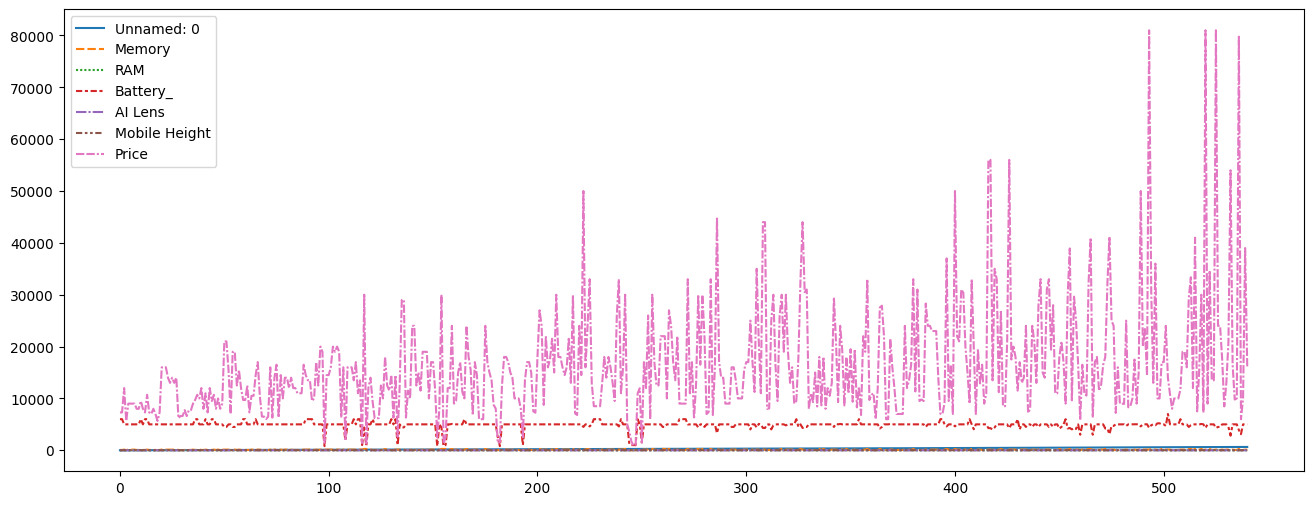

In [36]:
#Plot the Data
plt.figure(figsize=(16,6))
sns.lineplot(data=data)

<Axes: title={'center': 'Battery power by products'}, ylabel='Battery_'>

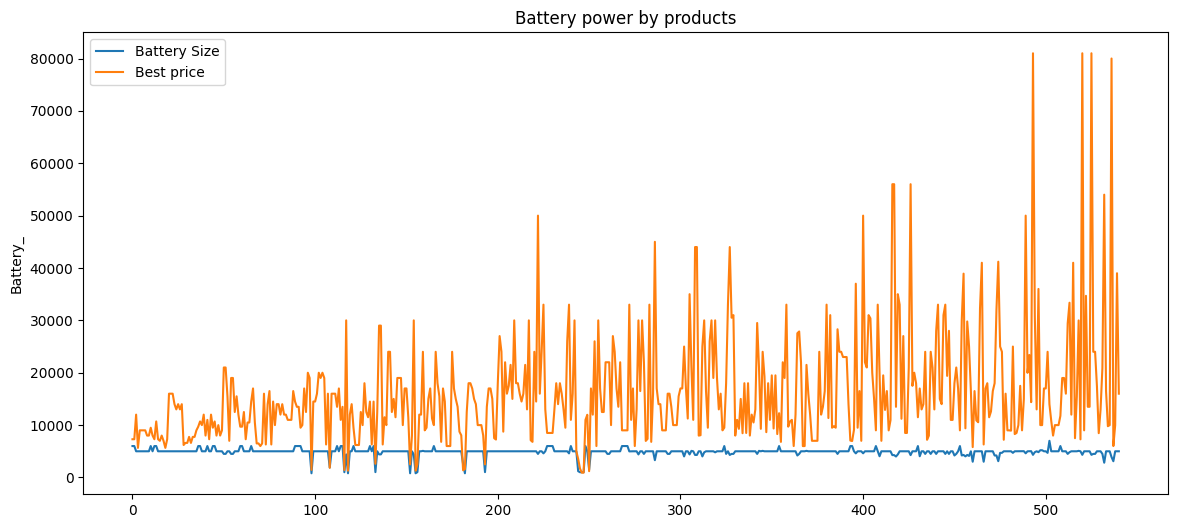

In [37]:
#We will begin by printing the names of all columns
list(data.columns)
#We plot the lines corresponding to the first two columns in the dataset.
plt.figure(figsize=(14,6))
plt.title("Battery power by products")
#Line chart shows battery power for the each products
sns.lineplot(data=data['Battery_'], label="Battery Size")
#Line chart shows best price for the each powers
sns.lineplot(data=data['Price'], label= "Best price")

## **Bar Chart**
- Bar graphs are used to compare things between different groups or to track changes over time. However, when trying to measure change over time, bar graphs are best when the changes are larger.

Text(0, 0.5, 'battery_size ')

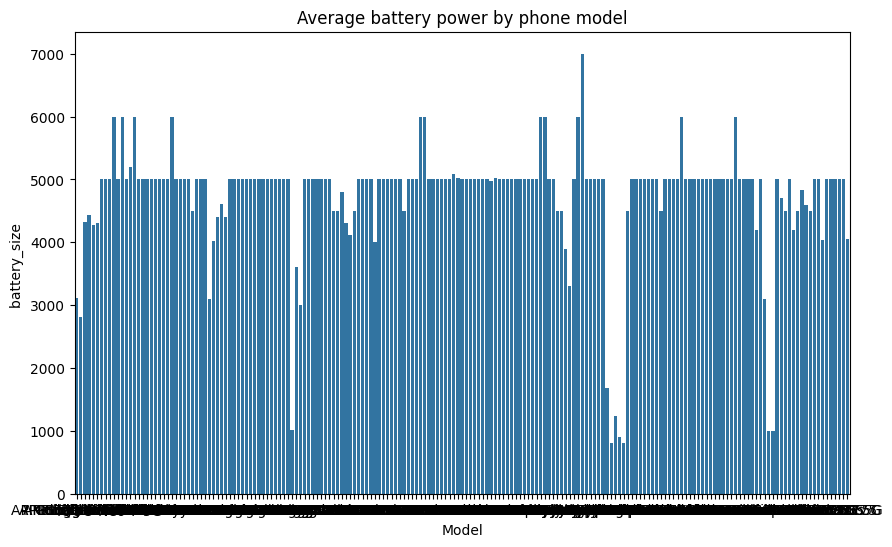

In [38]:
#Set the width and height of the figure
plt.figure(figsize=(10,6))
#Add title
plt.title("Average battery power by phone model")
#Bar chart showing average battery power by phone brands
# Group the data by 'Model' and calculate the mean battery power for each group.
# Then reset the index to convert the result into a DataFrame suitable for plotting.
model_battery = data.groupby('Model')['Battery_'].mean().reset_index()
sns.barplot(x='Model', y='Battery_', data=model_battery)
#Add label for vertical axis
plt.ylabel("battery_size ")

In [39]:
import plotly.express as px
fig = px.violin(data, x="Price", y="RAM", color="Price", box=True,points = "all")
fig.show()

In [40]:
fig = px.scatter_3d(data, x='RAM', y='Memory', z='Price',
              color='Price')
fig.show()

# **Histogram**

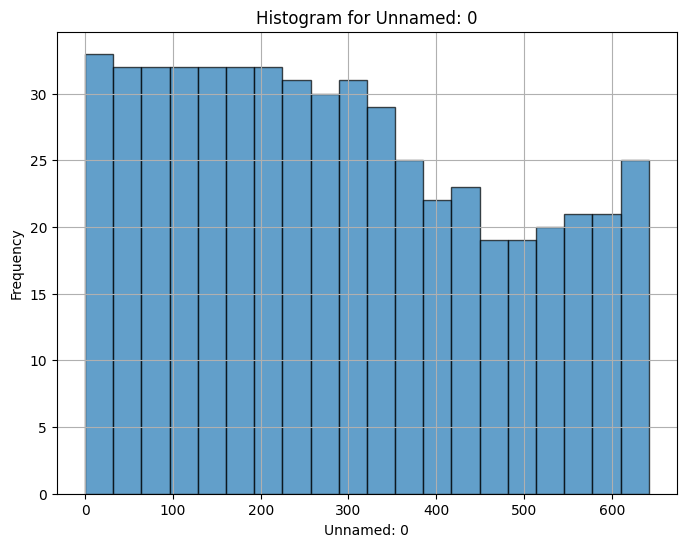

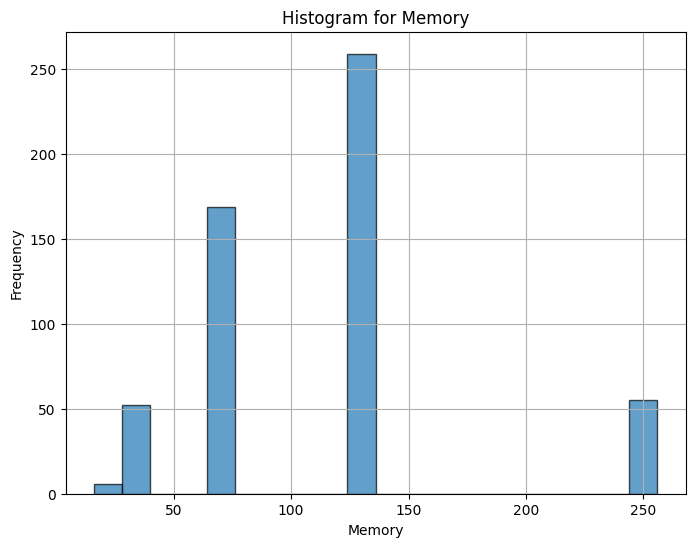

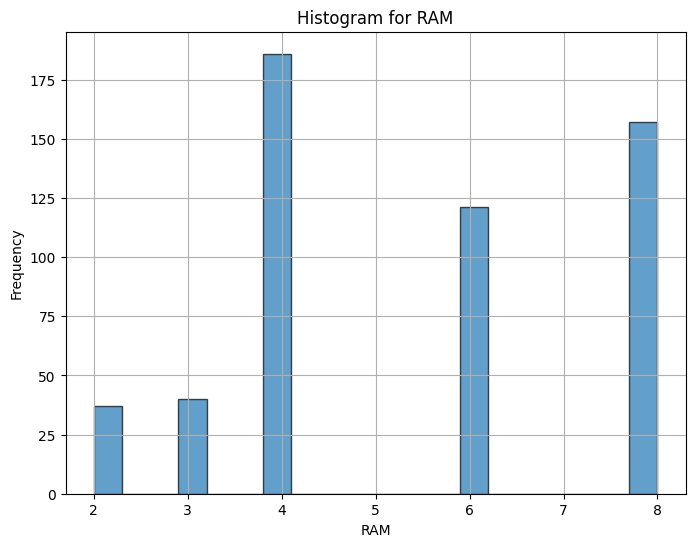

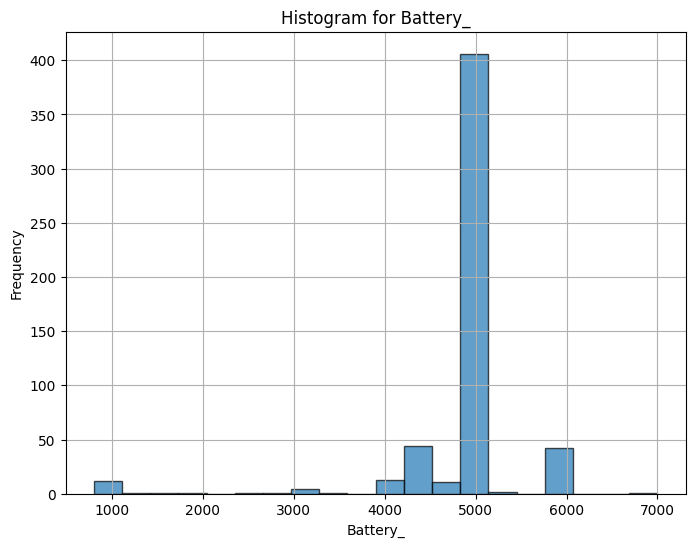

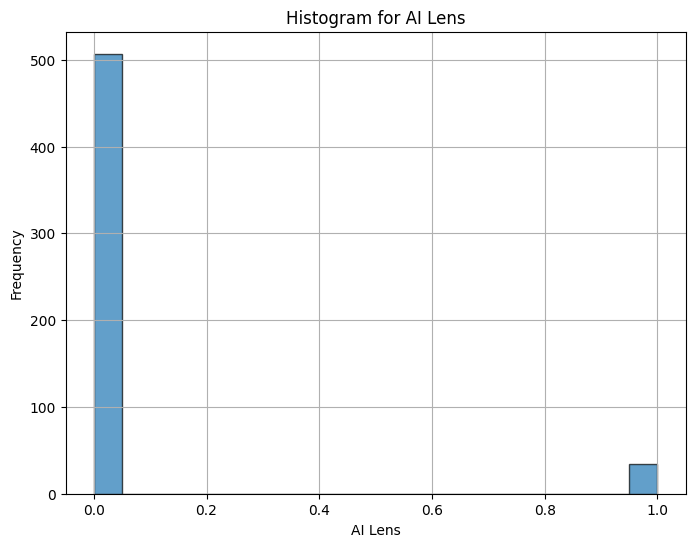

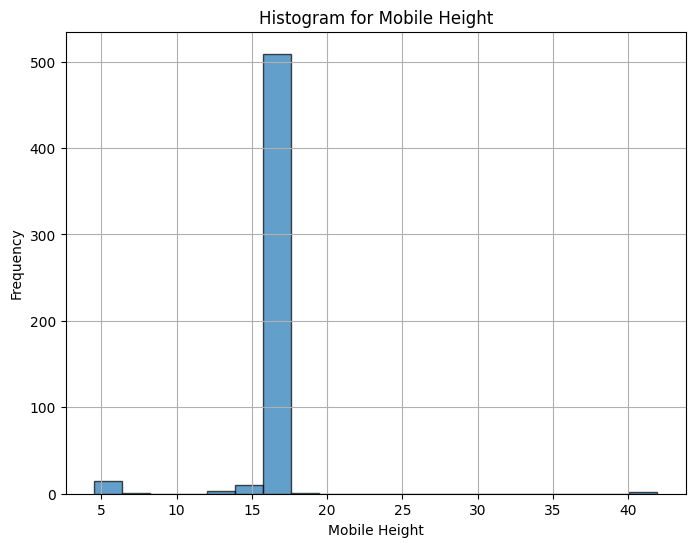

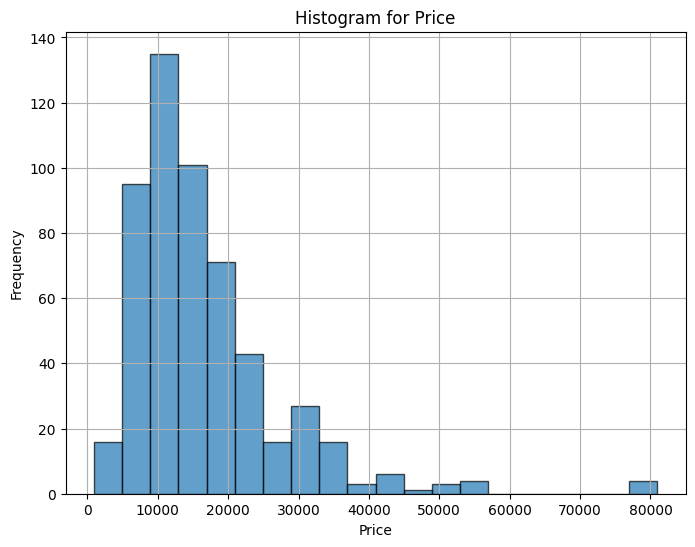

In [41]:
# Visualize data using histograms
for column in num_col:
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## **Box Plot**

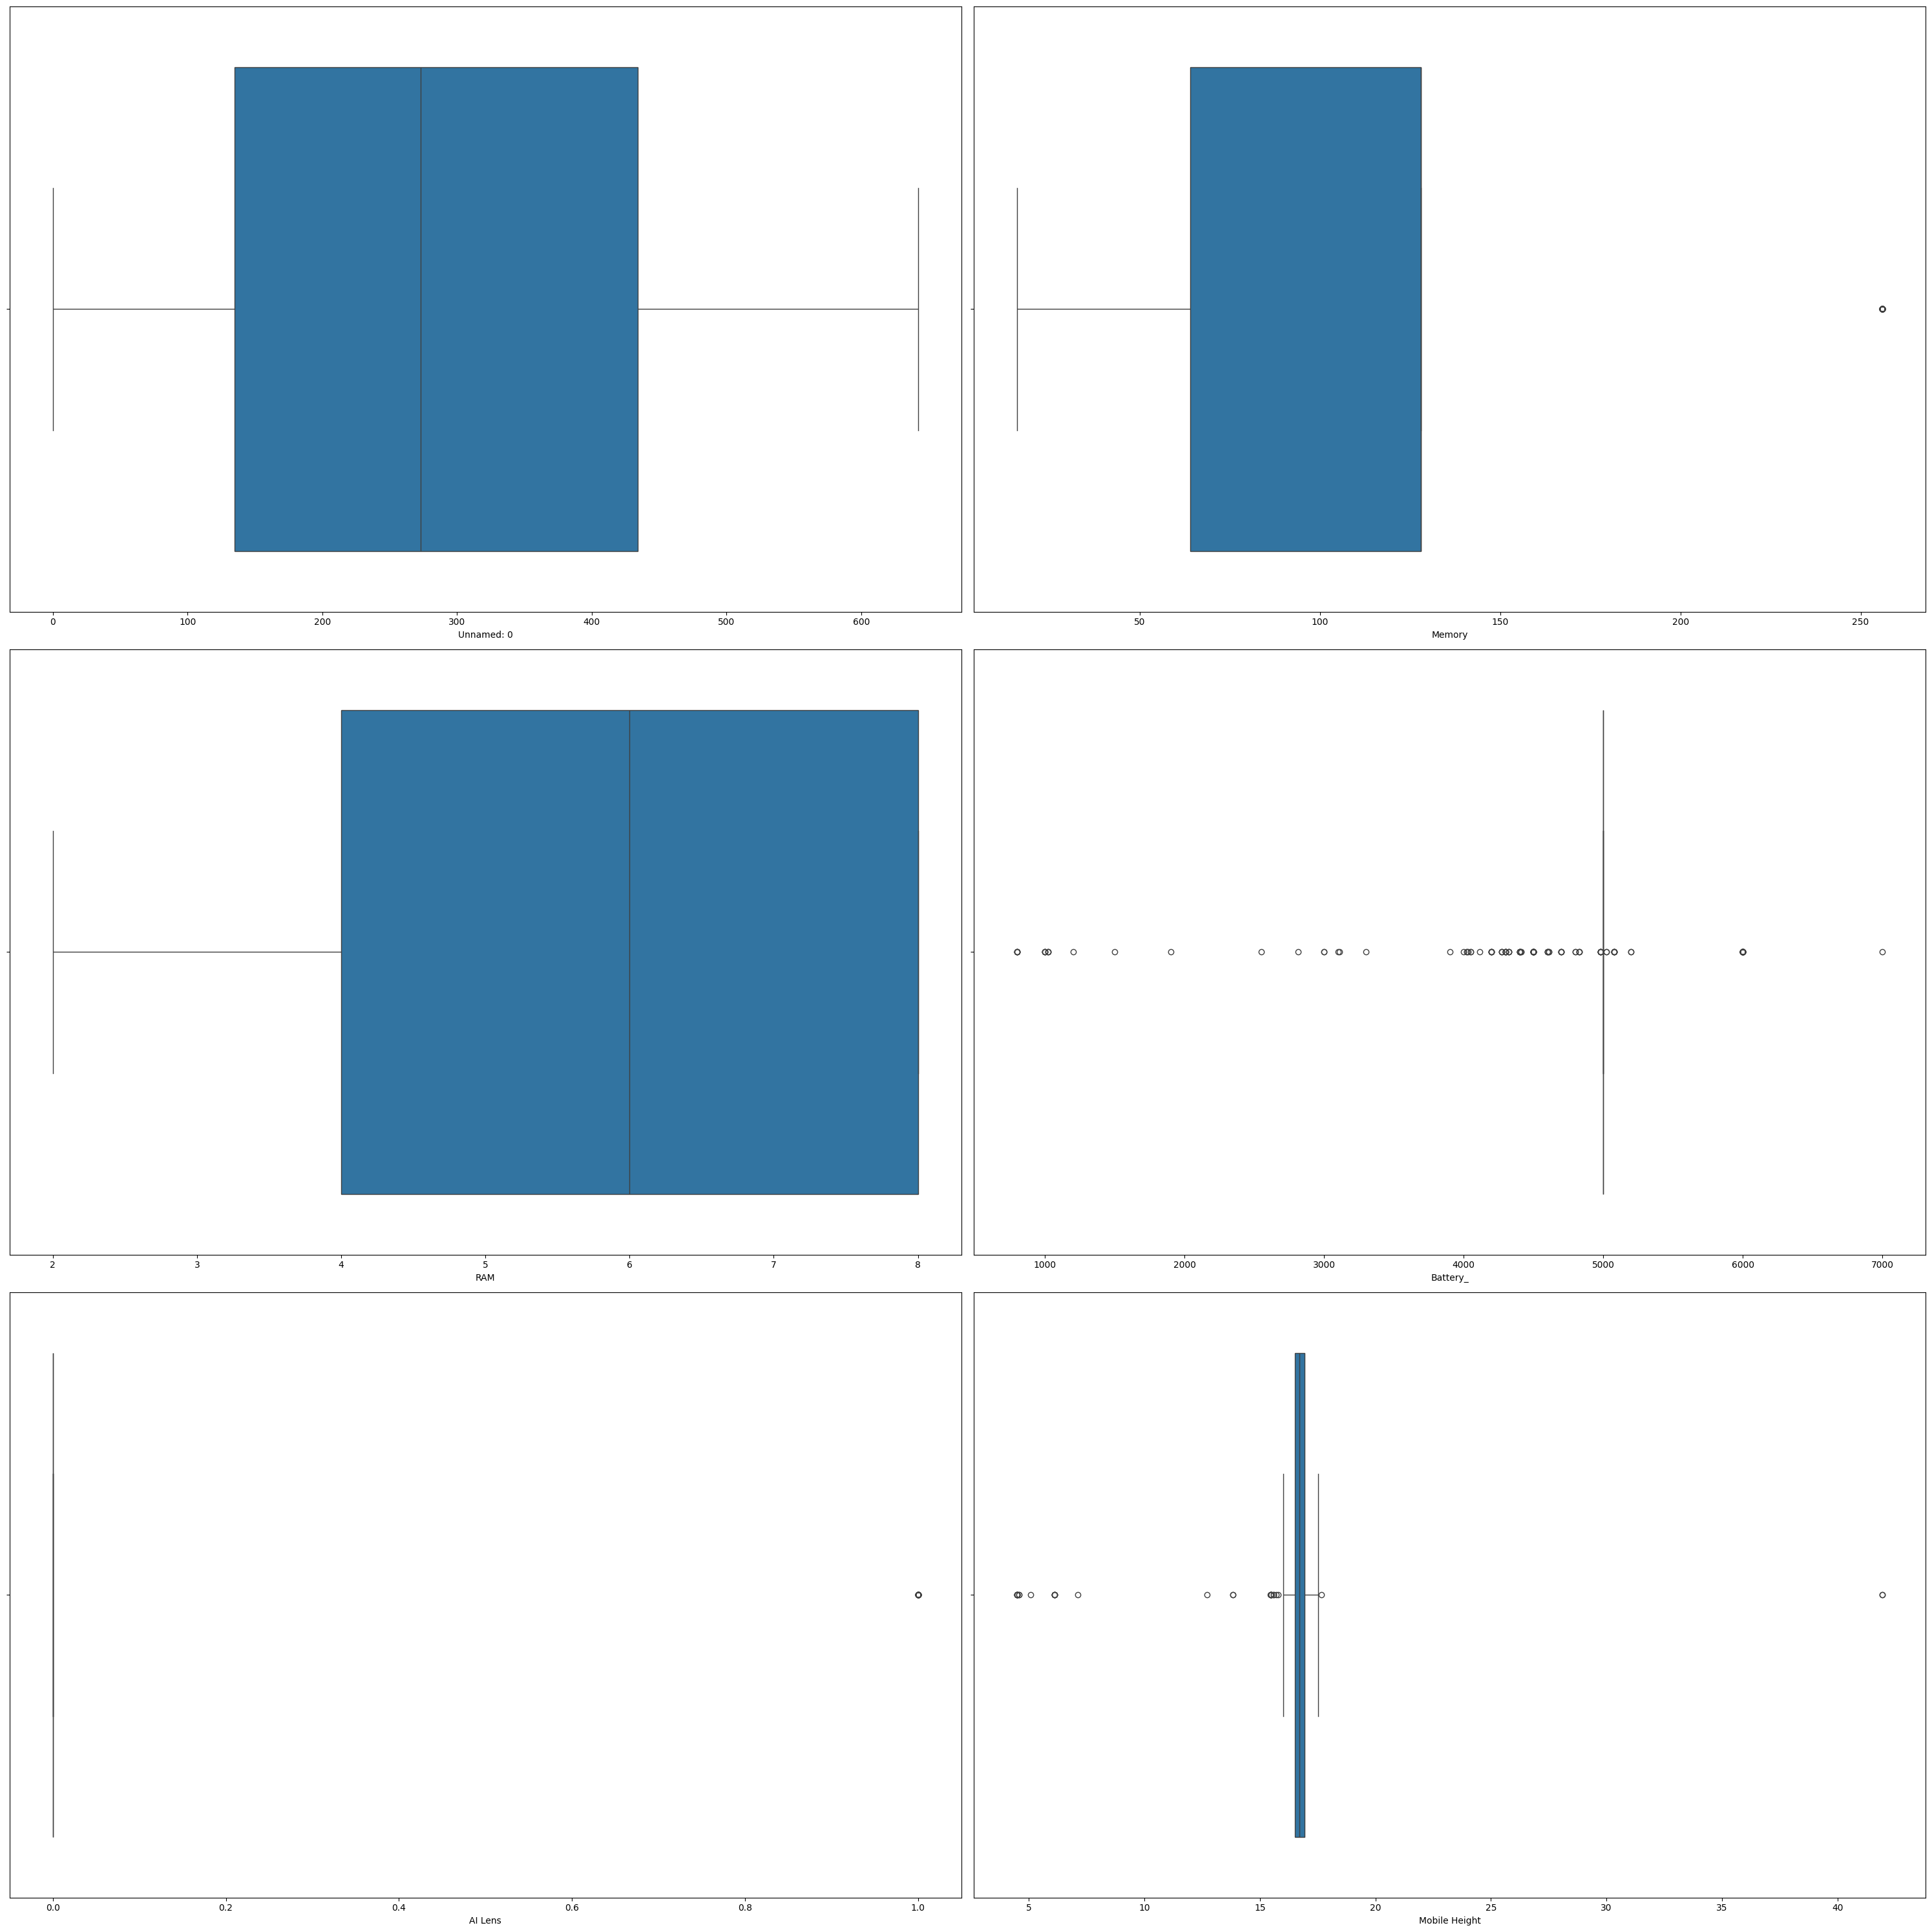

In [42]:
#  Create the plot grid
rows = 3
columns = 2

fig, axes = plt.subplots(rows,columns, figsize=(30,30))

x, y = 0, 0

for i, column in enumerate(num_col):
    sns.boxplot(x=data[column], ax=axes[x, y])

    if y < columns-1:
        y += 1
    else: # Simplified condition - reset y when a row is filled
        x += 1
        y = 0

    # Check if we've filled all subplots
    if x >= rows:
        break

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

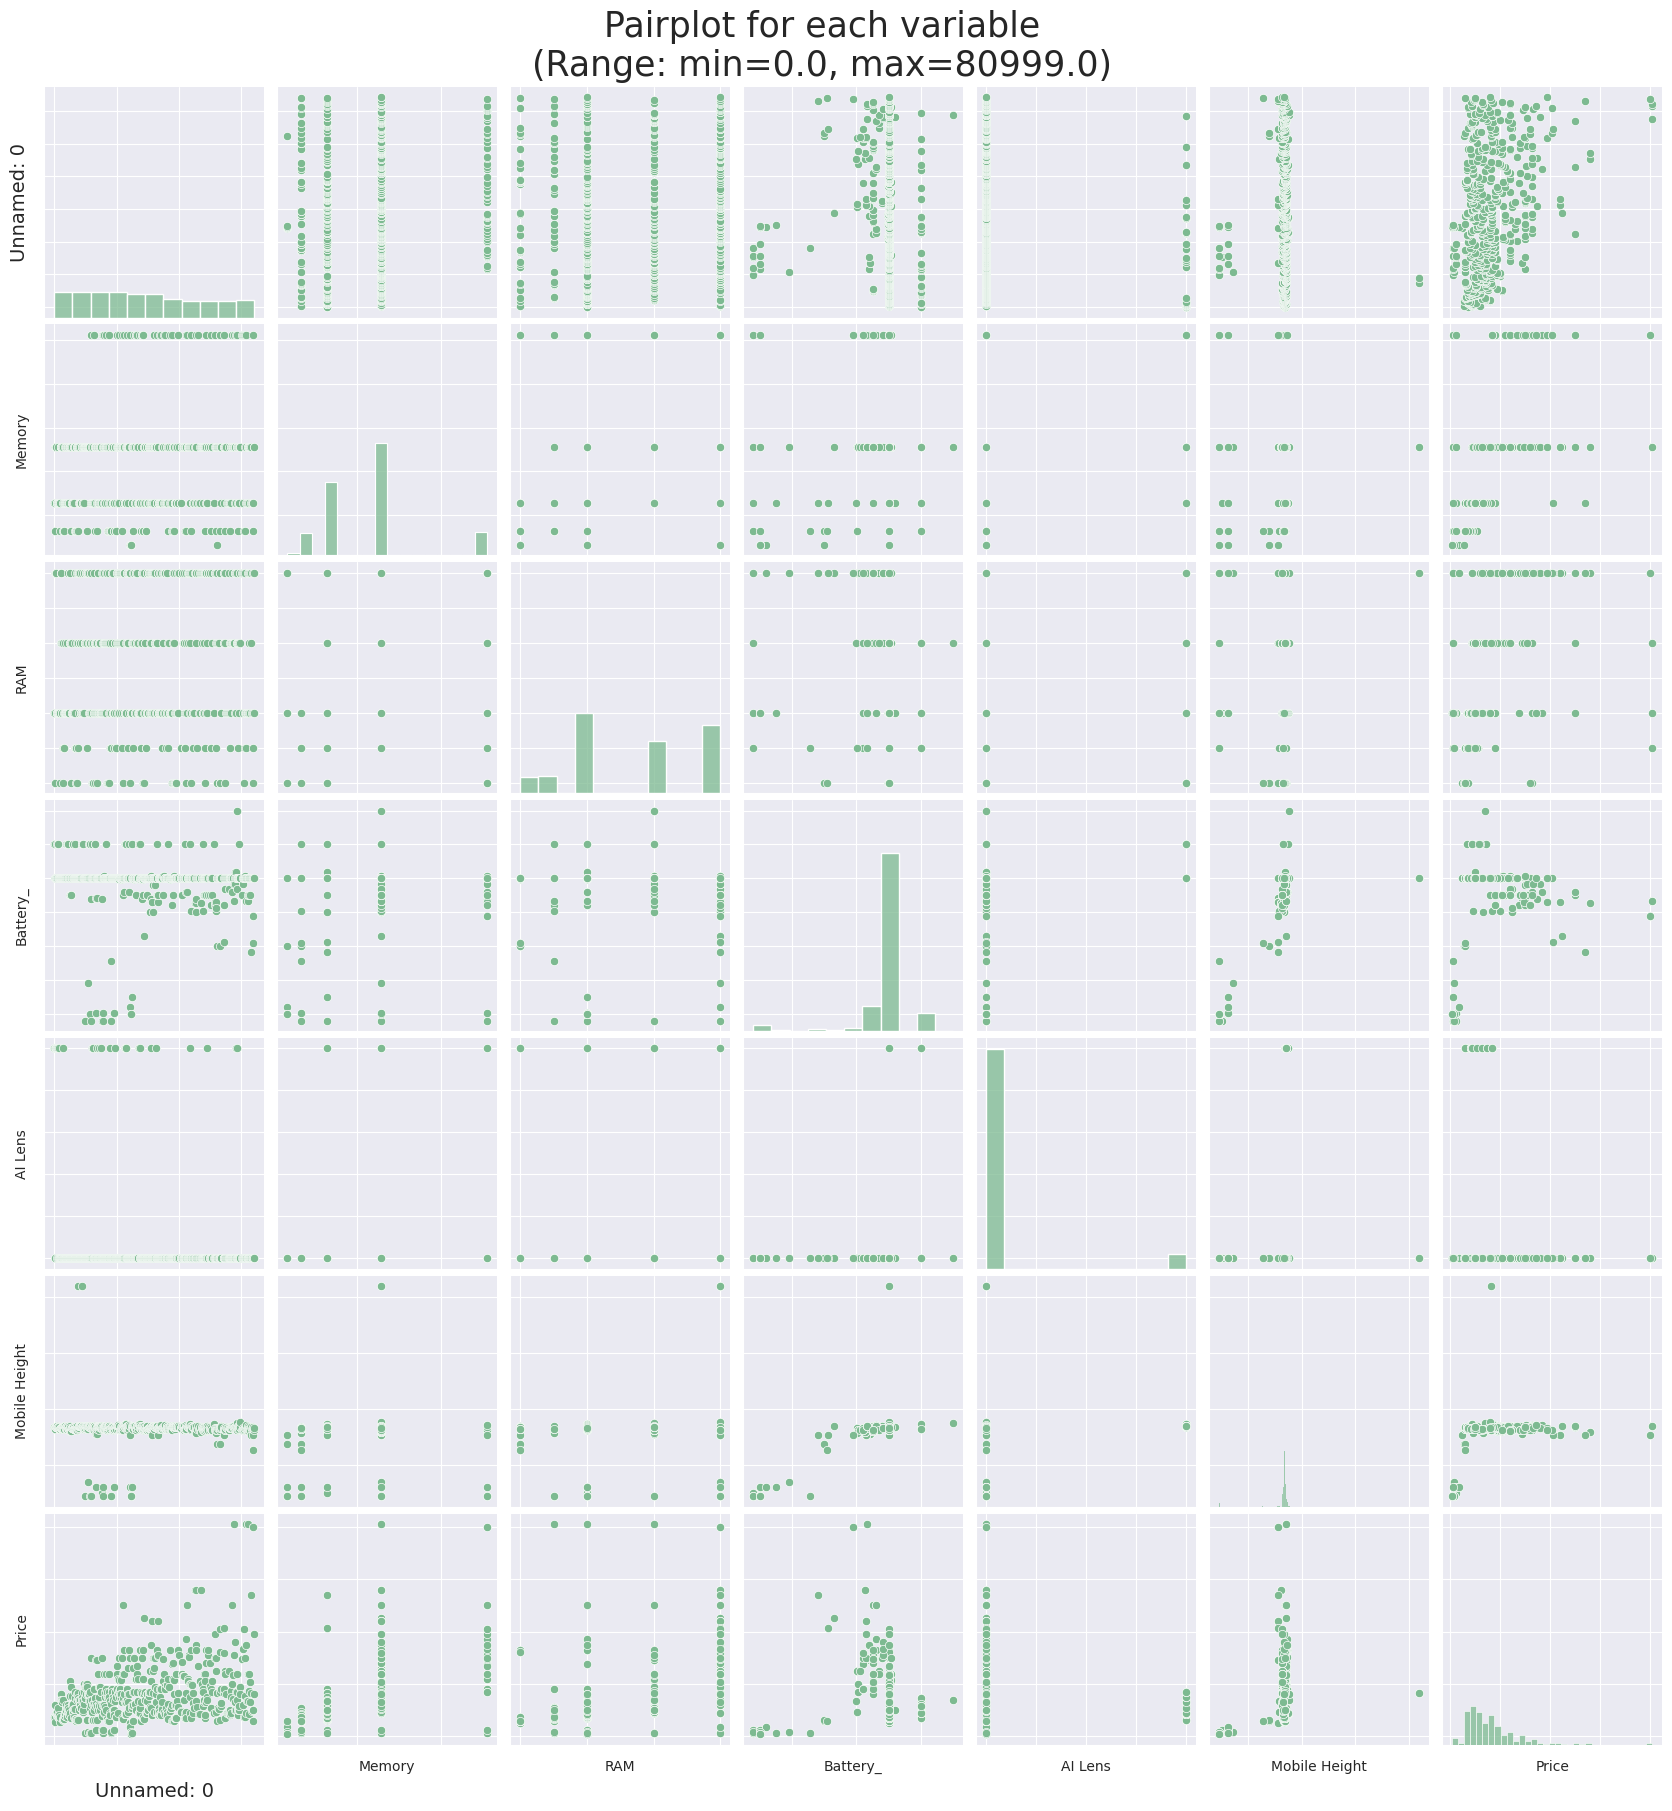

In [43]:
#Check noises by pairplot
sns.set_palette('crest')
sns.set_style('darkgrid')
# Convert num_cols to a list
dnp = sns.pairplot(data, vars=num_col.columns.tolist())

# Add axis labels and tick labels to the plot
dnp.set(xticklabels=[], yticklabels=[])
dnp.axes[0][0].set_ylabel(num_col.columns.tolist()[0], fontsize=14)
dnp.axes[-1][0].set_xlabel(num_col.columns.tolist()[0], fontsize=14)
dnp.axes[-1][0].xaxis.labelpad = 20
dnp.axes[-1][-1].yaxis.labelpad = 20

# Title of the plot
dnp.fig.suptitle('Pairplot for each variable\n(Range: min={}, max={})'.format(data[num_col.columns].min().min(), data[num_col.columns].max().max()), y=1.03, fontsize=25)

# Show the plot
plt.show()


# **3. Data Cleaning:**

**Missing Values**

In [44]:
data.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Price            0
dtype: int64

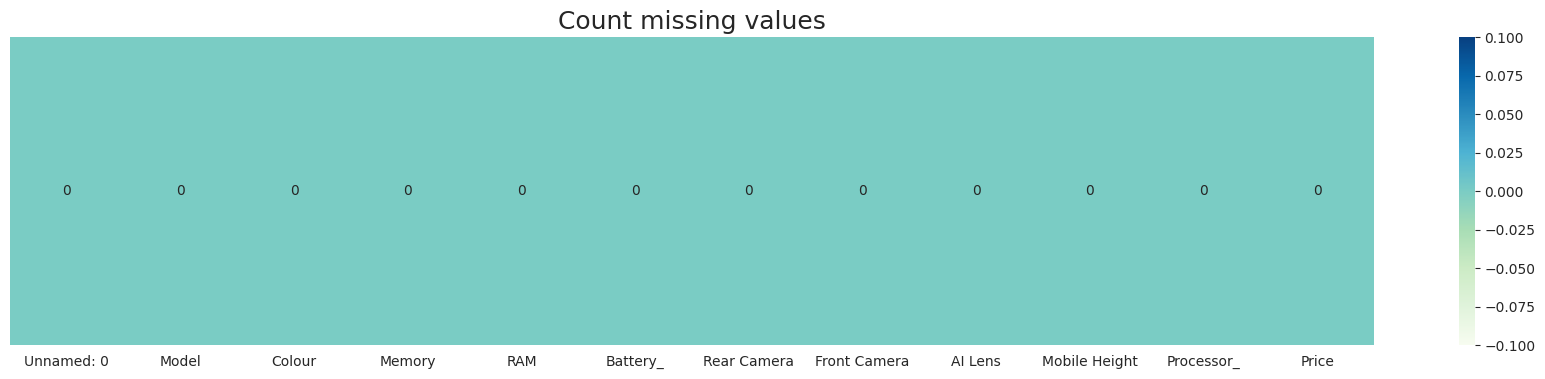

In [45]:
# Missing values
plt.figure(figsize=(22,4))
sns.heatmap((data.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values', fontsize=18)
plt.show()

In [46]:
# Check for duplicates
data.duplicated().sum()

0

In [47]:
# Remove duplicates in-place
data.drop_duplicates(inplace=True)

In [48]:
data.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Price'],
      dtype='object')

In [49]:
# Check for remaining missing values
missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Price            0
dtype: int64


In [50]:
data.duplicated().sum()

0

In [51]:
# Drop the "Unnamed: 0" column
data = data.drop(columns=['Unnamed: 0'])

In [52]:
num_cols = data.select_dtypes(include=['int64', 'float64'])

## **Detect Outliers**

In [53]:
# Calculate the IQR for each column in the dataset
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR)))

# Count the number of outliers for each variable
num_outliers = outliers.sum()

# Number of outliers for each variable
num_outliers.to_frame().T

,Memory,RAM,Battery_,AI Lens,Mobile Height,Price
0,55,0,152,34,33,25


## **Remove Outliers**

In [54]:
def clean_data(df):
    removed_outliers_info = {}  # Dictionary to store information about removed outliers

    def remove_outliers(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        return column[(column >= Q1 - 1.5 * IQR) & (column <= Q3 + 1.5 * IQR)]

    # Iterate over each numerical column
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Count rows before outlier removal
        rows_before = df.shape[0]

        # Remove outliers from the column
        cleaned_column = remove_outliers(df[column])

        # Count rows after outlier removal
        rows_after = cleaned_column.shape[0]

        # Calculate number of outliers removed
        outliers_removed = rows_before - rows_after

        # Store information about removed outliers
        removed_outliers_info[column] = outliers_removed

        # Replace the column with cleaned data and fill NaNs with median
        df[column] = cleaned_column
        df[column].fillna(cleaned_column.median(), inplace=True)

    # Drop rows with any remaining NaN values
    df.dropna(inplace=True)

    # Create a DataFrame of cleaned data
    cleaned_data = df.copy()

    # Return cleaned DataFrame and removed outliers information
    return cleaned_data, pd.DataFrame.from_dict(removed_outliers_info, orient='index', columns=['Outliers Removed']).T

# Call the function to clean data
cleaned_data, df_removed_outliers = clean_data(data)

print("\nInformation about removed outliers:")
df_removed_outliers


Information about removed outliers:


,Memory,RAM,Battery_,AI Lens,Mobile Height,Price
Outliers Removed,55,0,152,34,33,25


In [55]:
cleaned_data

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,Infinix SMART 7,Night Black,64.0,4,5000.0,13MP,5MP,0.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0
1,Infinix SMART 7,Azure Blue,64.0,4,5000.0,13MP,5MP,0.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0
2,MOTOROLA G32,Mineral Gray,128.0,8,5000.0,50MP,16MP,0.0,16.64,Qualcomm Snapdragon 680,11999.0
3,POCO C50,Royal Blue,32.0,2,5000.0,8MP,5MP,0.0,16.56,Mediatek Helio A22,5649.0
4,Infinix HOT 30i,Marigold,128.0,8,5000.0,50MP,5MP,0.0,16.76,G37,8999.0
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,128.0,8,5000.0,50MP,12MP,0.0,16.76,Qualcomm Snapdragon 8 Gen 2,12999.0
537,LAVA Z21,Cyan,32.0,2,5000.0,5MP,2MP,0.0,16.76,Octa Core,5998.0
538,Tecno Spark 8T,Turquoise Cyan,64.0,4,5000.0,50MP,8MP,0.0,16.76,MediaTek Helio G35,9990.0
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128.0,8,5000.0,50MP,32MP,0.0,16.26,"Exynos 1380, Octa Core",12999.0


In [56]:
data.isnull().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Price            0
dtype: int64

In [57]:
data['Price'].isnull().sum()

0

# **4. Exploratory Data Analysis**

**What are the most popular Model?**

In [58]:

brand_counts = data['Model'].value_counts()

# Get the top 5 most popular models
top_models = brand_counts.head(5)

# Create a bar chart using Plotly Express
fig = px.bar(x=top_models.index, y=top_models.values,
             labels={'x': 'Model', 'y': 'Count'},
             title='Top 5 Most Popular Models',
             template='plotly_dark')

# Update layout for better readability
fig.update_layout(xaxis_tickangle=-45, xaxis_tickfont_size=12)

fig.show()

**Whar are model with high storage ?**



In [59]:

# Find models with high storage (assuming 'Memory' represents storage size)
high_storage_models = data.sort_values(by='Memory', ascending=False).head(5)

print("Models with High Storage:")
print(high_storage_models[['Model', 'Memory']])

# Visualize models with high storage
fig = px.bar(high_storage_models, x='Model', y='Memory',
             labels={'Model': 'Model', 'Memory': 'Memory (GB)'},
             title='Models with High Storage',
             template='plotly_dark')

fig.show()

Models with High Storage:
            Model  Memory
540      OPPO A77   128.0
431      vivo Y75   128.0
235   vivo T1 44W   128.0
234   vivo T1 44W   128.0
233  MOTOROLA g52   128.0


**visualize the relationship between 'RAM' and 'Memory' of mobile phones, and use 'Price' to determine the color of the points**.

In [60]:
# Create a scatter plot with color mapping based on 'Price'
fig = px.scatter(data_frame=data, x='RAM', y='Memory', color='Price',
                 labels={'RAM': 'RAM (GB)', 'Memory': 'Memory (GB)', 'Price': 'Price ($)'},
                 title='Scatter Plot: RAM vs Memory (Color by Price)',
                 template='plotly_dark')

fig.show()

**Which models offer the best value for money based on storage capacity and price?**

In [61]:
# Calculate the price per GB
data['Price_per_GB'] = data['Price'] / data['Memory']

# Sort the models by price per GB in ascending order (lower price per GB means better value for money)
best_value_models = data.sort_values(by='Price_per_GB')

# Display the top models offering the best value for money
best_value_models[['Model', 'Memory', 'Price', 'Price_per_GB']].T

,118,155,116,98,108,250,156,133,152,181,...,513,484,290,291,325,456,243,449,448,460
Model,micromax 1,micromax 2,micromax,Micromax IN 2C,micromax 2,micromax,micromax 3,Micromax 3,micromax 3,micromax,...,vivo V25 Pro 5G,POCO C31,realme C33,realme C33,POCO X2,vivo Y1s,redmi max,vivo Y16,vivo Y16,Nokia C01 Plus
Memory,128.0,128.0,128.0,128.0,128.0,64.0,128.0,128.0,64.0,32.0,...,128.0,32.0,32.0,32.0,64.0,32.0,16.0,32.0,32.0,16.0
Price,1299.0,1299.0,1422.0,1449.0,1849.0,1199.0,2499.0,2615.0,2490.0,1375.0,...,33367.0,8499.0,8999.0,8999.0,17999.0,9387.0,4999.0,10989.0,10989.0,5799.0
Price_per_GB,10.148438,10.148438,11.109375,11.320312,14.445312,18.734375,19.523438,20.429688,38.90625,42.96875,...,260.679688,265.59375,281.21875,281.21875,281.234375,293.34375,312.4375,343.40625,343.40625,362.4375


In [62]:
# Visualize using Plotly Express
fig = px.bar(best_value_models,
             x='Model',
             y='Price_per_GB',
             hover_data=['Memory', 'Price'],
             title='Best Value for Money Models (Price per GB)',
             labels={'Price_per_GB': 'Price per GB'},
             height=600)

# Update layout for better visualization
fig.update_layout(xaxis_title='Model', yaxis_title='Price per GB', xaxis_tickangle=-45)

# Show the plot
fig.show()


In [63]:
data['Price'].isnull().sum()

0

## **Bar Chart: Average Battery Capacity by Processor**
**What is the average battery capacity for each processor type?**

In [64]:
# Group by processor type and calculate the average battery capacity
avg_battery_by_processor = data.groupby('Processor_')['Battery_'].mean().reset_index()

# Rename columns for clarity
avg_battery_by_processor.columns = ['Processor', 'Average_Battery_Capacity']

In [65]:
avg_battery_by_processor

,Processor,Average_Battery_Capacity
0,0 0 0 208MHz,5000.0
1,"2GHz, Quad Core",5000.0
2,6 Core,5000.0
3,Android,5000.0
4,"Dimensity 1080, Octa Core",5000.0
...,...,...
118,Unisoc T616,5000.0
119,Unisoc Tiger T612 (12 nm),5000.0
120,Unisoc Tiger T616,5000.0
121,ios,5000.0


## **Heatmap: Correlation Between Features**
**What are the correlations between different features in the dataset?**

In [66]:
num_cols.corr()

,Memory,RAM,Battery_,AI Lens,Mobile Height,Price
Memory,1.000000,0.625284,-0.053210,-0.094442,0.063163,0.566660
RAM,0.625284,1.000000,-0.104923,-0.082622,0.092951,0.532024
Battery_,-0.053210,-0.104923,1.000000,0.150156,0.695641,-0.034297
AI Lens,-0.094442,-0.082622,0.150156,1.000000,0.052018,-0.153691
Mobile Height,0.063163,0.092951,0.695641,0.052018,1.000000,0.176009
Price,0.566660,0.532024,-0.034297,-0.153691,0.176009,1.000000


**The correlation matrix shows:**

- Most correlations between these features are weak, except for the strong positive relationships between Memory and RAM (0.625), and Battery and Mobile Height (0.696). This indicates that while some features like memory and RAM, and battery capacity and mobile height tend to increase together, most other features do not show strong linear relationships.

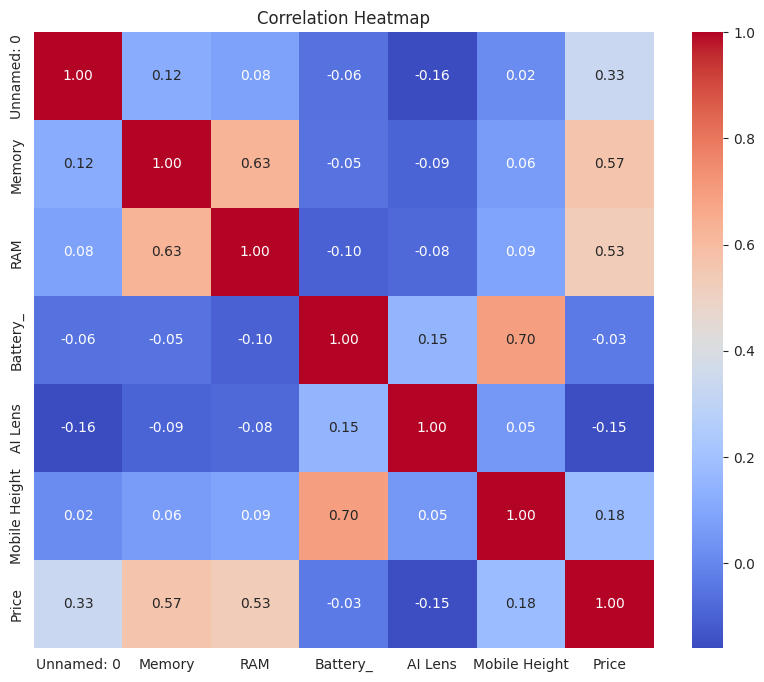

In [67]:
# Calculate the correlation matrix
correlation_matrix=num_cols.corr()
correlation_matrix
# Create a heatmap for the num cols
plt.figure(figsize=(10, 8))
sns.heatmap(num_col.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Histogram: Distribution of Mobile Heights**
**What is the distribution of mobile heights?**

In [68]:
# Create histogram
fig = px.histogram(data, x='Mobile Height',
                   title='Distribution of Mobile Heights',
                   labels={'Mobile Height': 'Mobile Height (mm)'},
                   template='plotly_dark')

# Show the plot
fig.show()

# **5. Data Preprocessing**

In [69]:
cleaned_data.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,Infinix SMART 7,Night Black,64.0,4,5000.0,13MP,5MP,0.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0
1,Infinix SMART 7,Azure Blue,64.0,4,5000.0,13MP,5MP,0.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0
2,MOTOROLA G32,Mineral Gray,128.0,8,5000.0,50MP,16MP,0.0,16.64,Qualcomm Snapdragon 680,11999.0
3,POCO C50,Royal Blue,32.0,2,5000.0,8MP,5MP,0.0,16.56,Mediatek Helio A22,5649.0
4,Infinix HOT 30i,Marigold,128.0,8,5000.0,50MP,5MP,0.0,16.76,G37,8999.0


In [70]:
cleaned_data.shape

(541, 11)

In [71]:
cleaned_data.isnull().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Price            0
dtype: int64

### **Encode Categorical Features**

## **Label Encoding:**

**Convert categorical variables into numerical labels. This is useful for algorithms that can handle numerical inputs but not categorical inputs.**

In [72]:
cat=cleaned_data.select_dtypes(include=['object'])

In [73]:
cat

,Model,Colour,Rear Camera,Front Camera,Processor_
0,Infinix SMART 7,Night Black,13MP,5MP,Unisoc Spreadtrum SC9863A1
1,Infinix SMART 7,Azure Blue,13MP,5MP,Unisoc Spreadtrum SC9863A1
2,MOTOROLA G32,Mineral Gray,50MP,16MP,Qualcomm Snapdragon 680
3,POCO C50,Royal Blue,8MP,5MP,Mediatek Helio A22
4,Infinix HOT 30i,Marigold,50MP,5MP,G37
...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,50MP,12MP,Qualcomm Snapdragon 8 Gen 2
537,LAVA Z21,Cyan,5MP,2MP,Octa Core
538,Tecno Spark 8T,Turquoise Cyan,50MP,8MP,MediaTek Helio G35
539,SAMSUNG Galaxy A54 5G,Awesome Lime,50MP,32MP,"Exynos 1380, Octa Core"


In [77]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Dictionary to store the encoded values
encoded_columns = {}

# Encode categorical columns
for column in cat:
    # Fit and transform the column, note the indentation here
    encoded_columns[column] = label_encoder.fit_transform(cleaned_data[column])

# Create a DataFrame of encoded values
encoded_data = pd.DataFrame(encoded_columns)

# Concatenate the encoded DataFrame with the cleaned_data DataFrame
data2 = pd.concat([cleaned_data.drop(columns=cat), encoded_data], axis=1)

# Display the combined DataFrame
print("\nCombined DataFrame:")
data2


Combined DataFrame:


,Memory,RAM,Battery_,AI Lens,Mobile Height,Price,Model,Colour,Rear Camera,Front Camera,Processor_
0,64.0,4,5000.0,0.0,16.76,7299.0,23,159,3,10,113
1,64.0,4,5000.0,0.0,16.76,7299.0,23,20,3,10,113
2,128.0,8,5000.0,0.0,16.64,11999.0,37,149,10,4,75
3,32.0,2,5000.0,0.0,16.56,5649.0,69,201,13,10,56
4,128.0,8,5000.0,0.0,16.76,8999.0,12,130,10,10,14
...,...,...,...,...,...,...,...,...,...,...,...
536,128.0,8,5000.0,0.0,16.76,12999.0,118,49,10,2,89
537,32.0,2,5000.0,0.0,16.76,5998.0,32,52,11,6,68
538,64.0,4,5000.0,0.0,16.76,9990.0,123,259,10,12,35
539,128.0,8,5000.0,0.0,16.26,12999.0,110,17,10,7,11


In [78]:
data2

,Memory,RAM,Battery_,AI Lens,Mobile Height,Price,Model,Colour,Rear Camera,Front Camera,Processor_
0,64.0,4,5000.0,0.0,16.76,7299.0,23,159,3,10,113
1,64.0,4,5000.0,0.0,16.76,7299.0,23,20,3,10,113
2,128.0,8,5000.0,0.0,16.64,11999.0,37,149,10,4,75
3,32.0,2,5000.0,0.0,16.56,5649.0,69,201,13,10,56
4,128.0,8,5000.0,0.0,16.76,8999.0,12,130,10,10,14
...,...,...,...,...,...,...,...,...,...,...,...
536,128.0,8,5000.0,0.0,16.76,12999.0,118,49,10,2,89
537,32.0,2,5000.0,0.0,16.76,5998.0,32,52,11,6,68
538,64.0,4,5000.0,0.0,16.76,9990.0,123,259,10,12,35
539,128.0,8,5000.0,0.0,16.26,12999.0,110,17,10,7,11


In [79]:
label_encoder

LabelEncoder()



---



# **one-hot encoding**

**Convert categorical variables (e.g., model, colour) into a suitable numerical format, such as one-hot encoding.**


In [95]:
# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=data.columns[:2])


In [96]:
data_encoded

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price,Price_per_GB,...,Colour_VertMenthe,Colour_Volcanic Grey,Colour_Waterfall Blue,Colour_Watery Blue,Colour_Watery Grey,Colour_White,Colour_White Lily,Colour_Wildcat Blue,Colour_Yellow,Colour_chalk
0,-0.903946,-0.704665,0.0,13MP,5MP,0.0,0.163273,Unisoc Spreadtrum SC9863A1,-1.013353,114.046875,...,False,False,False,False,False,False,False,False,False,False
1,-0.903946,-0.704665,0.0,13MP,5MP,0.0,0.163273,Unisoc Spreadtrum SC9863A1,-1.013353,114.046875,...,False,False,False,False,False,False,False,False,False,False
2,0.821044,1.312392,0.0,50MP,16MP,0.0,-0.338132,Qualcomm Snapdragon 680,-0.353516,93.742188,...,False,False,False,False,False,False,False,False,False,False
3,-1.766441,-1.713193,0.0,8MP,5MP,0.0,-0.672402,Mediatek Helio A22,-1.244998,176.531250,...,False,False,False,False,False,False,False,False,False,False
4,0.821044,1.312392,0.0,50MP,5MP,0.0,0.163273,G37,-0.774689,70.304688,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0.821044,1.312392,0.0,50MP,12MP,0.0,0.163273,Qualcomm Snapdragon 8 Gen 2,-0.213125,101.554688,...,False,False,False,False,False,False,False,False,False,False
537,-1.766441,-1.713193,0.0,5MP,2MP,0.0,0.163273,Octa Core,-1.196002,187.437500,...,False,False,False,False,False,False,False,False,False,False
538,-0.903946,-0.704665,0.0,50MP,8MP,0.0,0.163273,MediaTek Helio G35,-0.635561,156.093750,...,False,False,False,False,False,False,False,False,False,False
539,0.821044,1.312392,0.0,50MP,32MP,0.0,-1.925916,"Exynos 1380, Octa Core",-0.213125,101.554688,...,False,False,False,False,False,False,False,False,False,False


In [97]:
data2

,Memory,RAM,Battery_,AI Lens,Mobile Height,Price,Model,Colour,Rear Camera,Front Camera,Processor_
0,64.0,4,5000.0,0.0,16.76,7299.0,23,159,3,10,113
1,64.0,4,5000.0,0.0,16.76,7299.0,23,20,3,10,113
2,128.0,8,5000.0,0.0,16.64,11999.0,37,149,10,4,75
3,32.0,2,5000.0,0.0,16.56,5649.0,69,201,13,10,56
4,128.0,8,5000.0,0.0,16.76,8999.0,12,130,10,10,14
...,...,...,...,...,...,...,...,...,...,...,...
536,128.0,8,5000.0,0.0,16.76,12999.0,118,49,10,2,89
537,32.0,2,5000.0,0.0,16.76,5998.0,32,52,11,6,68
538,64.0,4,5000.0,0.0,16.76,9990.0,123,259,10,12,35
539,128.0,8,5000.0,0.0,16.26,12999.0,110,17,10,7,11


In [98]:
data2.shape

(541, 11)

In [102]:
# Assume 'prize' is the target variable
X = data2.drop('Price', axis=1)
y = data2['Price']

In [103]:
#Splitting data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(378, 10)
(163, 10)
(378,)
(163,)


**Feature Scaling**
- **Normalize/Standardize Numerical Features**

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [106]:
X_train

,Memory,RAM,Battery_,AI Lens,Mobile Height,Model,Colour,Rear Camera,Front Camera,Processor_
428,128.0,8,5000.0,0.0,16.71,184,171,10,4,47
370,128.0,8,5000.0,0.0,16.76,77,40,10,4,49
57,128.0,6,5000.0,0.0,16.64,39,148,10,4,79
332,64.0,4,5000.0,0.0,16.76,125,259,10,12,35
24,128.0,4,5000.0,0.0,16.71,172,90,10,12,5
...,...,...,...,...,...,...,...,...,...,...
71,32.0,3,5000.0,0.0,16.51,147,64,13,10,116
106,32.0,3,5000.0,0.0,16.56,69,48,13,10,56
270,64.0,4,5000.0,0.0,17.32,14,0,10,12,67
435,32.0,2,5000.0,0.0,16.59,102,44,3,10,18


In [107]:
X_test

,Memory,RAM,Battery_,AI Lens,Mobile Height,Model,Colour,Rear Camera,Front Camera,Processor_
229,64.0,4,5000.0,0.0,17.32,11,125,3,12,31
73,32.0,2,5000.0,0.0,16.56,90,119,13,10,56
352,128.0,8,5000.0,0.0,16.94,80,115,12,4,79
86,64.0,4,5000.0,0.0,17.07,153,198,12,12,21
470,128.0,4,5000.0,0.0,16.76,160,77,10,12,40
...,...,...,...,...,...,...,...,...,...,...
275,32.0,3,5000.0,0.0,16.56,53,31,13,10,115
362,32.0,2,5000.0,0.0,16.76,127,265,13,10,110
31,64.0,4,5000.0,0.0,17.04,71,186,10,10,59
113,128.0,6,5000.0,0.0,16.76,114,3,10,12,83


In [105]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **6. Feature Extraction**

# **1. Missing Value Ratio**

In [108]:
# Calculate the percentage of missing values for each feature
missing_ratio = data.isnull().mean()

# Display the missing value ratio
print("Missing Value Ratio:\n", missing_ratio)

Missing Value Ratio:
 Model            0.0
Colour           0.0
Memory           0.0
RAM              0.0
Battery_         0.0
Rear Camera      0.0
Front Camera     0.0
AI Lens          0.0
Mobile Height    0.0
Processor_       0.0
Price            0.0
Price_per_GB     0.0
dtype: float64


**Remove Features with High Missing Value Ratio.**

In [109]:
# Set a threshold for missing values (e.g., 30%)
threshold = 0.30

# Select features that have a missing value ratio below the threshold
features_to_keep = missing_ratio[missing_ratio < threshold].index

# Create a new dataframe with selected features
data_reduced = data[features_to_keep]

# Display the reduced dataframe
data_reduced

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price,Price_per_GB
0,Infinix SMART 7,Night Black,-0.903946,-0.704665,0.0,13MP,5MP,0.0,0.163273,Unisoc Spreadtrum SC9863A1,-1.013353,114.046875
1,Infinix SMART 7,Azure Blue,-0.903946,-0.704665,0.0,13MP,5MP,0.0,0.163273,Unisoc Spreadtrum SC9863A1,-1.013353,114.046875
2,MOTOROLA G32,Mineral Gray,0.821044,1.312392,0.0,50MP,16MP,0.0,-0.338132,Qualcomm Snapdragon 680,-0.353516,93.742188
3,POCO C50,Royal Blue,-1.766441,-1.713193,0.0,8MP,5MP,0.0,-0.672402,Mediatek Helio A22,-1.244998,176.531250
4,Infinix HOT 30i,Marigold,0.821044,1.312392,0.0,50MP,5MP,0.0,0.163273,G37,-0.774689,70.304688
...,...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,0.821044,1.312392,0.0,50MP,12MP,0.0,0.163273,Qualcomm Snapdragon 8 Gen 2,-0.213125,101.554688
537,LAVA Z21,Cyan,-1.766441,-1.713193,0.0,5MP,2MP,0.0,0.163273,Octa Core,-1.196002,187.437500
538,Tecno Spark 8T,Turquoise Cyan,-0.903946,-0.704665,0.0,50MP,8MP,0.0,0.163273,MediaTek Helio G35,-0.635561,156.093750
539,SAMSUNG Galaxy A54 5G,Awesome Lime,0.821044,1.312392,0.0,50MP,32MP,0.0,-1.925916,"Exynos 1380, Octa Core",-0.213125,101.554688


In [115]:
from sklearn.preprocessing import StandardScaler

# Standardize the numeric features (mean=0 and variance=1)
scaler = StandardScaler()
# Assuming 'num_cols' contains the names of numeric columns
data2[num_cols.columns] = scaler.fit_transform(data2[num_cols.columns])


In [116]:
data2[num_cols.columns]

,Memory,RAM,Battery_,AI Lens,Mobile Height,Price
0,-0.903946,-0.704665,0.0,0.0,0.163273,-1.013353
1,-0.903946,-0.704665,0.0,0.0,0.163273,-1.013353
2,0.821044,1.312392,0.0,0.0,-0.338132,-0.353516
3,-1.766441,-1.713193,0.0,0.0,-0.672402,-1.244998
4,0.821044,1.312392,0.0,0.0,0.163273,-0.774689
...,...,...,...,...,...,...
536,0.821044,1.312392,0.0,0.0,0.163273,-0.213125
537,-1.766441,-1.713193,0.0,0.0,0.163273,-1.196002
538,-0.903946,-0.704665,0.0,0.0,0.163273,-0.635561
539,0.821044,1.312392,0.0,0.0,-1.925916,-0.213125


# **Univarient Feature Selection**

In [119]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer


In [120]:
data2.shape

(541, 11)

In [121]:
cat.columns

Index(['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_'], dtype='object')

In [124]:
data2.isnull().sum()

Memory           0
RAM              0
Battery_         0
AI Lens          0
Mobile Height    0
Price            0
Model            0
Colour           0
Rear Camera      0
Front Camera     0
Processor_       0
dtype: int64

In [127]:
# Apply SelectKBest with chi2, ensuring k is less than or equal to the number of features
ordered_rank_features = SelectKBest(score_func=chi2, k=10)  # Set k to a value <= number of features
ordered_feature = ordered_rank_features.fit(X, y)

In [128]:
# Create a DataFrame to hold feature scores
dfscores = pd.DataFrame(ordered_feature.scores_, columns=["Score"])

In [130]:
# Create a DataFrame to hold feature names
dfcolumns = pd.DataFrame(X.columns, columns=["Features"])

In [132]:
# Concatenate DataFrames to create a ranked feature list
features_rank = pd.concat([dfcolumns, dfscores], axis=1)

In [133]:
# Rename columns for clarity
features_rank.columns = ['Features', 'Score']

In [134]:
# Display the ranked features
features_rank

,Features,Score
0,Memory,6.333831e+03
1,RAM,2.900037e+02
2,Battery_,1.442981e-25
3,AI Lens,NaN
4,Mobile Height,5.841816e-01
5,Model,6.499107e+03
6,Colour,7.082755e+03
7,Rear Camera,4.656258e+02
8,Front Camera,6.532737e+02
9,Processor_,4.347567e+03


Feature Importance
This technique gives you a score for each feature of your data,the higher the score mor relevant it is

# **Filter Methods**
- Filter methods evaluate the intrinsic properties of the features based on univariate statistics and do not involve any machine learning model. These methods are fast and computationally efficient, making them suitable for high-dimensional data.

In [138]:
from sklearn.feature_selection import mutual_info_classif

# Assuming X and y are your features and target variable
information_gain = mutual_info_classif(X, y)

In [139]:
information_gain

array([1.56464392, 1.45091225, 1.32704588, 0.01721491, 1.11533955,
       1.32224911, 0.07718764, 1.01273244, 1.46067726, 1.31816315])

# **Fisher’s Score:**

Ranks variables based on their Fisher score, which measures the separation between classes.

In [141]:
!pip install skfeature

ERROR: Could not find a version that satisfies the requirement skfeature (from versions: none)
ERROR: No matching distribution found for skfeature


In [143]:
import numpy as np

def fisher_score(X, y):
    classes = np.unique(y)
    fisher_scores = []
    for feature in X.T:
        numerator = 0
        denominator = 0
        overall_mean = np.mean(feature)
        for c in classes:
            class_feature = feature[y == c]
            class_mean = np.mean(class_feature)
            class_variance = np.var(class_feature)
            numerator += len(class_feature) * (class_mean - overall_mean) ** 2
            denominator += len(class_feature) * class_variance
        fisher_scores.append(numerator / denominator)
    return np.array(fisher_scores)

fisher_scores = fisher_score(X.values, y.values)
fisher_score_df = pd.DataFrame({'Feature': X.columns, 'Fisher Score': fisher_scores})
fisher_score_df = fisher_score_df.sort_values(by='Fisher Score', ascending=False)
print(fisher_score_df)

         Feature  Fisher Score
0         Memory      4.867699
1            RAM      2.783755
8   Front Camera      1.699448
7    Rear Camera      1.207695
9     Processor_      0.887693
5          Model      0.726302
4  Mobile Height      0.460343
6         Colour      0.393801
2       Battery_           NaN
3        AI Lens           NaN


Memory is the most significant feature with the highest Fisher Score of 4.867699, indicating it has the greatest discriminative power.
RAM also shows substantial discriminative power with a score of 2.783755.
Front Camera and Rear Camera are moderately important, with scores of 1.699448 and 1.207695, respectively.
Processor_, Model, Mobile Height, and Colour have lower but notable discriminative power, with scores ranging from 0.887693 to 0.393801.
Battery_ and AI Lens have missing (NaN) Fisher Scores, indicating they were either not evaluated or lacked sufficient data to provide a meaningful score.

# **Correlation Coefficient:**

Measures the linear relationship between features and the target.
High correlation with the target but low correlation among features is desired.

# **Feature Importance**
- This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [144]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Assuming 'X' is your DataFrame with categorical features
label_encoders = {}
imputer = SimpleImputer(strategy='most_frequent')  # Create imputer once
X_imputed = imputer.fit_transform(X)  # Impute missing values for the entire DataFrame

for i, col in enumerate(X.columns):
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X_imputed[:, i] = le.fit_transform(X_imputed[:, i])  # Encode the imputed column
        label_encoders[col] = le  # Store the encoder for later use

X = pd.DataFrame(X_imputed, columns=X.columns)  # Convert imputed array back to DataFrame

model = ExtraTreesClassifier()
model.fit(X, y)  # Now fit the model with the imputed and encoded DataFrame


ExtraTreesClassifier()

In [145]:
print(model.feature_importances_)

[0.04813725 0.10620676 0.         0.         0.13663764 0.21307326
 0.11473386 0.0943935  0.08719363 0.19962411]


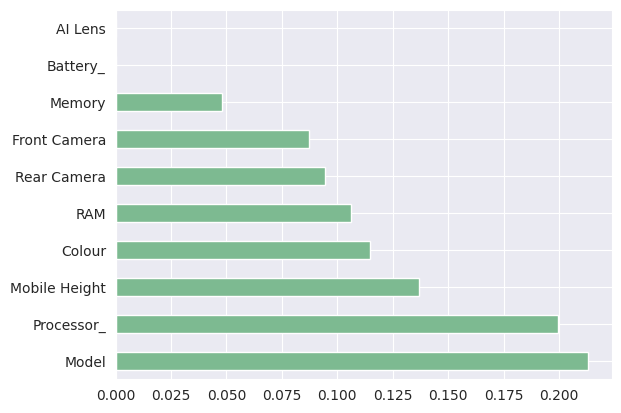

In [146]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

<Axes: >

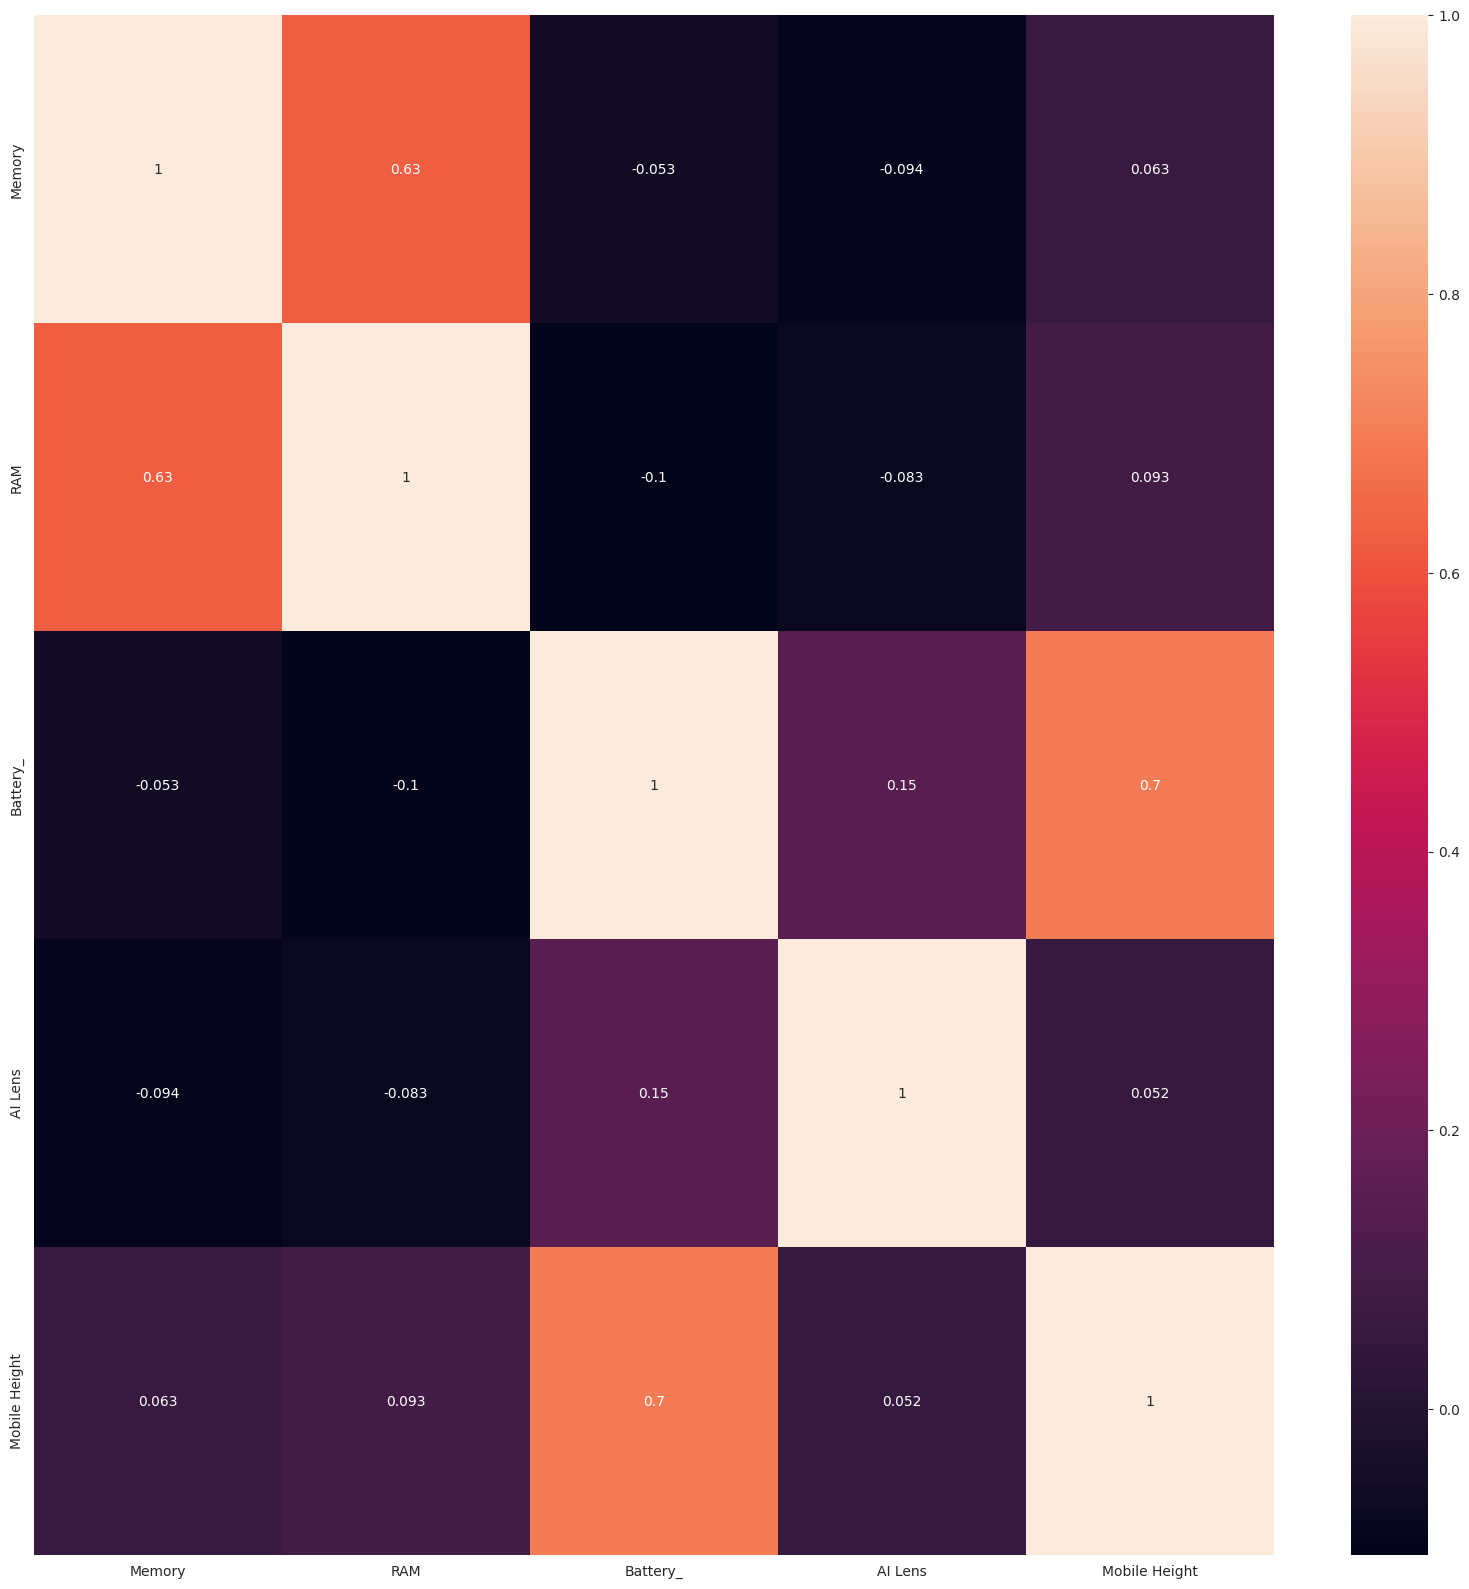

In [148]:
import seaborn as sns
corr=num_cols.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(num_cols[top_features].corr(),annot=True)

 **Remove The correlated**

In [149]:
threshold=0.8

In [150]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [151]:
correlation(num_cols.iloc[:,:-1],threshold)

set()

**SelectKBest with f_regression**

In [155]:
from sklearn.feature_selection import SelectKBest, f_regression

Price = num_cols['Price']

#Perform SelectKBest feature selection using f_regression
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(num_cols.drop('Price', axis=1), Price) # Remove the target variable from the input features

# Get scores and feature names
feature_scores = pd.DataFrame({'Feature': num_cols.drop('Price', axis=1).columns, 'Score': selector.scores_}) # Update feature names to exclude target
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

In [157]:
feature_scores

,Feature,Score
0,Memory,254.935168
1,RAM,212.795810
4,Mobile Height,17.231581
3,AI Lens,13.039714
2,Battery_,0.634769


# **7. Model Building**

In [174]:
#Defining X and Y
X = data2.drop('Price',axis=1)
y = data2['Price']

In [175]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [176]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(432, 10)
(109, 10)
(432,)
(109,)


# **Linear Regression**

In [180]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [181]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

In [183]:
y_pred_train

array([-0.09090105, -0.10078868,  0.13240265,  0.5359967 , -0.71295221,
        0.81338589,  0.59031426, -1.18546176,  0.39039451,  0.57364386,
        0.94570837, -1.18638226,  1.015141  , -0.86013058, -0.97142803,
       -0.75915442,  0.0418634 ,  0.41351238,  0.35008281,  0.76468049,
       -0.88705371, -0.94235085,  0.8859959 ,  0.35617883, -1.24857375,
        0.81659989,  0.11368483,  0.88608962,  0.04311301,  0.8180057 ,
        0.76373768,  0.94328954, -0.97050303, -1.05802947, -0.66385582,
       -0.93511126,  0.56843969, -1.05349965,  1.00635195,  0.4946251 ,
        0.46624683,  0.01493441, -0.81929985,  0.75035358,  0.46988926,
        0.44048494, -0.43281137,  0.61304363, -0.65434308, -1.13799458,
       -1.05165648, -0.4804792 ,  0.35750851, -0.28584604,  1.00941116,
        0.81504873,  0.36876389, -0.54399562,  0.15060172, -0.6133382 ,
        0.89035113,  0.65259946, -0.70560243, -0.71243457, -0.69710302,
        0.55706963,  0.65191217,  0.90797514, -1.04538633,  0.46

In [184]:
y_pred_test

array([-0.70216601, -1.20963151,  0.94949242, -0.29872738,  0.14273853,
        0.27035854, -0.56932885,  0.37812094,  0.86565307, -0.75977561,
        0.53929487,  0.61023202,  0.94952366,  0.73794104,  0.18509472,
        0.42486692, -0.46573027,  0.82232769,  0.8255677 ,  0.36168812,
       -0.93735198,  0.91462929, -0.57563936,  0.62733728,  0.83151322,
        0.68115439, -1.1997099 ,  0.82129341, -0.46757407, -0.72585541,
        0.34665001,  0.30359093, -0.87144713,  0.53051325,  0.21241125,
       -0.00710129, -0.50406344,  0.59067731,  0.42680381, -0.52560772,
        0.50312897,  0.18571257,  0.98843547, -0.03511191, -1.250948  ,
        0.95809865,  0.59531168,  0.10918722, -0.78723331, -1.05180896,
        0.50236059,  0.75035358, -0.94625658, -0.71584419, -0.47097421,
       -0.02175599,  0.83757457,  0.75613301, -0.66608836,  0.29558261,
       -0.68165855,  0.94133475, -1.09090075,  0.94192654, -1.13081259,
       -0.8209077 ,  0.35890503,  0.5895513 , -0.51979705,  0.60

In [185]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.5216272675654936
Testing MSE: 0.36968491155133093
Training R2 Score: 0.48596570293535823
Testing R2 Score: 0.6051808371331671


**Conclusion: Linear Regression** shows moderate performance with an R² score of 0.485966 on training data and 0.605181 on testing data. It indicates that the model explains about 60.52% of the variance in the testing set, but it is not as effective as other models.

# **KNN**

In [187]:
from sklearn.neighbors import KNeighborsRegressor
mse_values = []
r2_values = []
max_neighbors = 10
for k in range(1, max_neighbors + 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

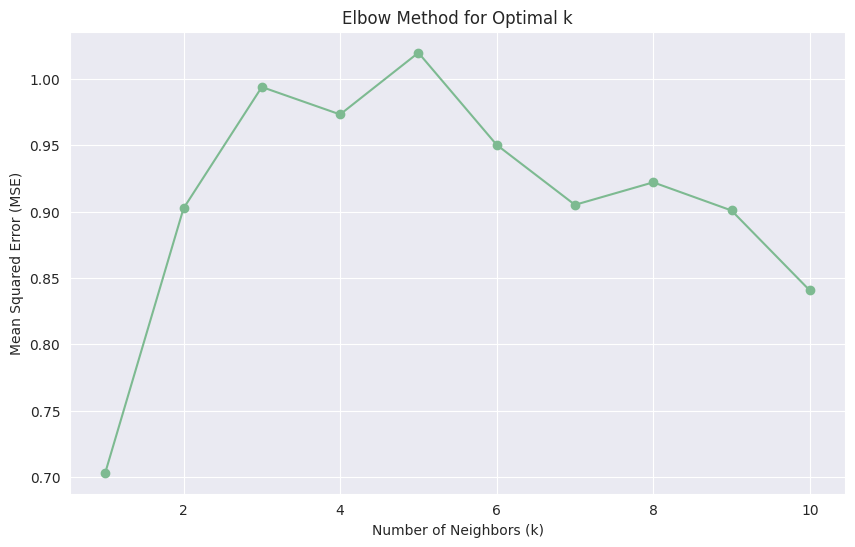

In [188]:
# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [189]:
# Choose the optimal k based on the elbow curve (lowest MSE)
optimal_k = mse_values.index(min(mse_values)) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")

Optimal number of neighbors (k): 1


In [190]:
# Train the KNN model with the optimal k
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [191]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [192]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.02022270318734052
Testing MSE: 0.703353270703081
Training R2 Score: 0.9800716648380612
Testing R2 Score: 0.24882693109296428


- **Overfitting:** The large discrepancy between the training and testing performance metrics suggests that the KNN model is overfitting the training data. It performs exceptionally well on the training set but fails to generalize to unseen data.
- **Poor Generalization:** The high Testing MSE and low Testing R² Score indicate that the model's predictions are not accurate on the testing set. The model is likely capturing noise in the training data rather than the underlying pattern.

.

# **DecisionTreeRegressor**

In [193]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_regressor = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [194]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_dt_regressor = DecisionTreeRegressor(**best_params)
best_dt_regressor.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}


DecisionTreeRegressor(max_depth=9, min_samples_split=5)

In [195]:
# Make predictions
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)

In [196]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.07807162769162582
Testing MSE: 0.24316053447759867
Training R2 Score: 0.9230648074659584
Testing R2 Score: 0.7403073924174293


**The Decision Tree** model performs extremely well on training data with an R² score of 0.990036, suggesting it might be overfitting. The testing performance is significantly lower with an R² score of 0.799817, indicating that it may not generalize as well to unseen data

# **RandomForestRegressor**

In [198]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [211]:
# Get the best hyperparameters, removing 'learning_rate' if it exists
best_params = grid_search.best_params_.copy()  # Create a copy to avoid modifying the original
best_params.pop('learning_rate', None)  # Safely remove 'learning_rate' if present

# Train the Random Forest model with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=300)

In [212]:
# Make predictions
y_pred_train = best_rf_regressor.predict(X_train)
y_pred_test = best_rf_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.35505954361101594
Testing MSE: 0.29803726588165114
Training R2 Score: 0.6501088147328007
Testing R2 Score: 0.681699684943256


The **Random Forest model** strikes a good balance between training and testing performance. It has a high training R² score of 0.968476 and maintains a robust testing R² score of 0.925649, indicating that it generalizes well to unseen data and avoids overfitting.

# **XGBRegressor**

In [213]:
from xgboost import XGBRegressor

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the XGBoost model
xgb_regressor = XGBRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [214]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the XGBoost model with the best hyperparameters
best_xgb_regressor = XGBRegressor(**best_params, random_state=42)
best_xgb_regressor.fit(X_train, y_train)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [215]:
# Make predictions
y_pred_train = best_xgb_regressor.predict(X_train)
y_pred_test = best_xgb_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.03168086962543457
Testing MSE: 0.04921268541831671
Training R2 Score: 0.968780287072968
Testing R2 Score: 0.9474414274097559


**XGBoost** shows excellent performance with an R² score of 0.989931 on training data and 0.917120 on testing data. This suggests that XGBoost is highly effective in capturing the underlying patterns in the data while maintaining good generalization ability.

# **Model comparison**

In [216]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df


,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,0.521627,0.369685,0.485966,0.605181
1,Decision Tree,0.010111,0.187440,0.990036,0.799817
2,Random Forest,0.031990,0.069618,0.968476,0.925649
3,XGBoost,0.010217,0.077604,0.989931,0.917120


# **Best Performing Model:**
- **Random Forest and XGBoost** are the top performers based on the testing R² scores. Both models have high R² scores on both training and testing datasets, indicating that they are highly effective and generalize well to unseen data.
- Overfitting Concerns: The Decision Tree model shows signs of overfitting, with a significant drop in performance from training to testing data.
- Moderate Performer: Linear Regression is the least effective among the four models, with moderate R² scores and higher MSE values.